In [1]:
from scipy.io import wavfile
fs,x = wavfile.read("Cascada - Everytime We Touch (Official Video).wav")

/var/folders/84/4m_9gh757zs8y1nsfz2j2c900000gn/T/ipykernel_17947/2076376999.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs,x = wavfile.read("Cascada - Everytime We Touch (Official Video).wav")


In [203]:
from scipy.io import wavfile
fs,x = wavfile.read("FastBoi.wav")

In [3]:
from scipy import signal
f, t, Sxx = signal.spectrogram(x[:,0], fs)
# print(x[25*fs:25*fs+int((1+1/15)*fs),0])

In [4]:
import numpy as np
dbSxx = 10*np.log10(Sxx)

(129, 42249)


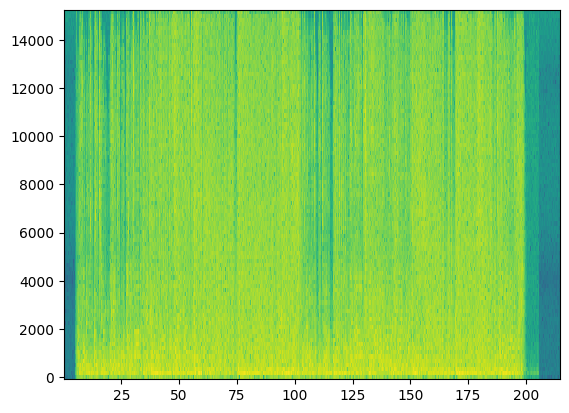

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

print(dbSxx.shape)

plt.pcolormesh(t, f[:-40], dbSxx[:-40,:])

# array = [1,1,1,1,2,2,3,3,4,5,6,8,10,12,14,18]
# lines = []

def logDownScale(arr):
    array = [1,1,1,1,2,2,3,3,4,5,6,8,10,12,14,18]
    lines = []
    for i in range(16):
        startline = sum(array[:i])
        endline = sum(array[:i])+array[i]
        # print(startline,endline)
        lines += [cv.resize(arr[startline+1:endline+1,:],(32,1),interpolation=cv.INTER_CUBIC)]
    return np.concatenate(lines, axis=0)[::-1,:]


# for i in range(16):
#     startline = sum(array[:i])
#     endline = sum(array[:i])+array[i]
#     print(startline,endline)
#     lines += [cv.resize(dbSxx[startline:endline,:],(32,1),interpolation=cv.INTER_NEAREST)]



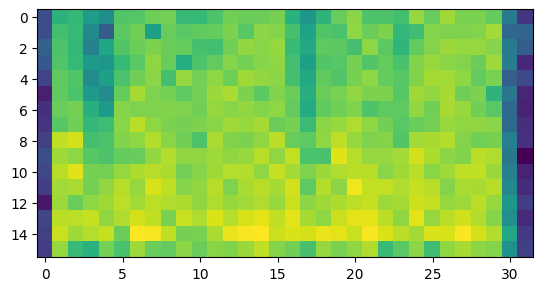

In [42]:
# print(lines)


plt.imshow(logDownScale(dbSxx))

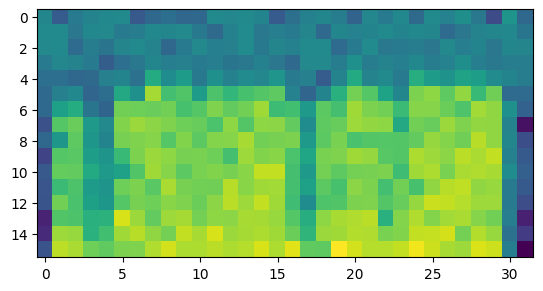

In [6]:
import cv2 as cv

out = cv.resize(dbSxx[::-1,:],(32,16),interpolation=cv.INTER_NEAREST)

plt.imshow(out)

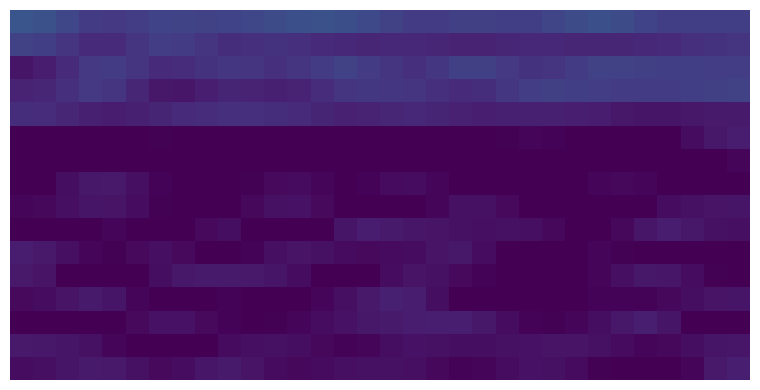

In [6]:
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import cv2 as cv
from time import sleep

start = 0
end = 200
# print(x)
fps = 15
endFrame = end*fps

monoX = x[:,0]

frames = []

frameDelay = []

def animate_core(frame_number):
    global frames, frameDelay
    seconds = (frame_number)/fps+start
    beginSamp = int((seconds)*fs)
    endSamp = int((seconds+1/fps)*fs)
    frame = monoX[beginSamp:endSamp]
    
    frameDelay += [frame]

    if frame_number > 3:
        fd = np.concatenate([*frameDelay[-4:]])
        # print(fd)
        f, t, Sxx = signal.spectrogram(fd, fs)
    else:
        f, t, Sxx = signal.spectrogram(frame, fs)

    dbSxx = 10*np.log10(Sxx)
    out = logDownScale(dbSxx)
    frames += [out]
    return out

fig = plt.figure()

ax = fig.add_subplot(111)

ax.axis("off")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.gcf().set_size_inches(8, 4)
plt.tight_layout()

# im=plt.imshow(animate_core(0),interpolation='none',vmin=-135.41602,vmax=47.808052)
im=ax.imshow(animate_core(0),interpolation='none',vmin=-70,vmax=47)

# im.axis('off')

def animate(frame_number):
    im.set_array(animate_core(frame_number))
    return [im]

  
anim = animation.FuncAnimation(fig, animate, frames=endFrame, 
                               interval = 1000 / fps)

anim.save("fast.mp4",fps=fps,extra_args=['-vcodec', 'libx264'],savefig_kwargs={"pad_inches":0})
    

In [7]:
# del range
out = cv.VideoWriter("outputAgain.mp4", cv.VideoWriter_fourcc(*'mp4v'), fps, (320, 160))
for i,frame in enumerate(frames):
    # print(frame.shape)
    # print(frame)
    vmin=-20
    vmax=47
    vrange=np.abs(vmin)+vmax

    greyNormalFrame = (np.clip(frame+np.abs(vmin),0,vrange)/(vrange)*255).astype(np.uint8)
    # print(np.amin(greyNormalFrame),np.amax(greyNormalFrame))
    # framergb = cv.cvtColor(greyNormalFrame,cv.COLOR_GRAY2RGB)
    framergb = cv.applyColorMap(greyNormalFrame, cv.COLORMAP)
    # greyToRGBLut =np.array([np.array(range(256)),np.array([255-i for i in range(256)]),np.zeros((256))]).astype(np.uint8)
    # greyToRGBLut = np.array([255-i for i in range(256)]).astype(np.uint8)
    # framergb = cv.LUT(framergb,greyToRGBLut)
    
    out.write(cv.resize(framergb,(320,160),interpolation=cv.INTER_NEAREST)) 
out.release()
!ffmpeg -y -i outputAgain.mp4 -i "Cascada - Everytime We Touch (Official Video).wav" -map 0:v:0 -map 1:a:0 -c:a aac -b:a 192k  FastForTT.mp4

error: OpenCV(4.7.0) /Users/opencv-cn/GHA-OCV-1/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/colormap.cpp:736: error: (-5:Bad argument) cv::ColorMap only supports source images of type CV_8UC1 or CV_8UC3 in function 'operator()'


In [184]:
!ffmpeg -f lavfi -i haldclutsrc=8 -vf "hue=H=2*PI*t:s=sin(2*PI*t)+1, curves=cross_process" -t 10 -c:v ffv1 clut.nut

ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/5.1.2_4 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack

In [116]:
!ffmpeg -y -i test.mp4 -i "Cascada - Everytime We Touch (Official Video).wav" -c:v copy -map 0:v:0 -map 1:a:0 -c:a aac -b:a 192k output.mp4

ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/5.1.2_4 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack

In [105]:
print(np.amax(frames))
print(np.amin(frames))

47.808052
-135.41602


In [4]:

import plotly.graph_objects as go
import plotly as py
import pandas as pd

fig = go.Figure(data=[go.Heatmap(
    x= t,
    y= f,
    z= 10*np.log10(Sxx),
    # z= 10*np.log10(Sxx),
    colorscale='Jet')])

fig.show()
# py.iplot(fig)